In [2]:
import gzip
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
#Funktion zum Laden der einzelnen Bilder
def open_images(filename):
    #öffnen der gzip-Datein
    with gzip.open(filename, "rb") as file:
        #Laden aller daten
        data = file.read()
        #Schreiben der Daten in ein Numpy Array und Rückgabe des Arrays
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1,28,28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename,"rb") as file:
        data = file.read()
        return np.frombuffer(data,dtype=np.uint8,offset=8)

#erstellen der Daten arrays
X_train = open_images("../Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = Sequential()

#Hinzufuegen eines Layers mit Dense
#100 = Anzahl der Neuronen (frei gewaehlt)
#784 = Anzahl der Pixel pro Bild
model.add(Dense(100, activation="sigmoid", input_shape=(784,))) # Hidden - Layer
model.add(Dense(10,activation="sigmoid")) # Output - Layer - Die 10 repräsentiert die Anzahl der Ausgänge

#1. Parameter = Optimierung der Gewichtung über SGD (Stochastic Gradient Decent - Gradientenabstiegsverfahren)
#2. Parameter = Standardwert
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
X_train.reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
model.fit(
    X_train.reshape(60000,784),
    y_train,
    epochs=10, #Anzahl wie häufig die Epochen durchlaufen werden sollen
    batch_size=1000 #Nach 1000 Bildern werden die Gewichte aktualisiert
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 9us/step - loss: 2.1266 - accuracy: 0.3058
Epoch 2/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.8619 - accuracy: 0.5100
Epoch 3/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.6551 - accuracy: 0.6082
Epoch 4/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.4830 - accuracy: 0.6608
Epoch 5/10
60000/60000 [==============================] - 1s 10us/step - loss: 1.3380 - accuracy: 0.6913
Epoch 6/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.2189 - accuracy: 0.7074
Epoch 7/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.1221 - accuracy: 0.7190
Epoch 8/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.0420 - accuracy: 0.7291
Epoch 9/10
60000/60000 [==============================] - 1s 8us/step - loss: 0.9759 - accuracy: 0.7394
Epoch 10/10
600

In [7]:
# -1 bedeutet bei numpy, dass alle Daten aus dem Array genommen werden sollen
model.evaluate(X_test.reshape(-1,784), y_test)

10000/10000 [==============================] - 0s 21us/step


[0.9108550006866455, 0.7390000224113464]

In [8]:
#Vorher:
# - ja / nein
# 10%     90%

model.predict(X_test.reshape(-1,784))

array([[0.01133624, 0.00841767, 0.00591204, ..., 0.0875369 , 0.02522558,
        0.47140843],
       [0.01337263, 0.00918725, 0.35899478, ..., 0.00499135, 0.0519675 ,
        0.01111913],
       [0.0210574 , 0.65104663, 0.01620117, ..., 0.02564454, 0.00501075,
        0.01870489],
       ...,
       [0.14484698, 0.00581259, 0.01773205, ..., 0.00560567, 0.37642333,
        0.0404833 ],
       [0.03084561, 0.4512543 , 0.02150387, ..., 0.0132761 , 0.0042432 ,
        0.03007051],
       [0.0059678 , 0.00608093, 0.00871107, ..., 0.11922178, 0.0343954 ,
        0.09077838]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


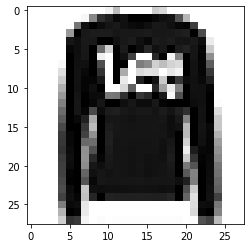

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1],cmap="gray_r")
plt.show()

In [10]:
pred = model.predict(X_test.reshape(-1,784))

In [11]:
pred[1]

array([0.01337263, 0.00918725, 0.35899478, 0.02567291, 0.11313307,
       0.00733885, 0.13171563, 0.00499135, 0.0519675 , 0.01111913],
      dtype=float32)

In [12]:
np.argmax(pred[1])

2